In [41]:
## importing relevant libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
sns.set()
%matplotlib inline


In [32]:
#importing dataset 
breastCancer = load_breast_cancer()

In [36]:
#merging the data set and finding out the correlation between the features to achieve feature selection 
data = pd.DataFrame(data=breastCancer.data,columns=breastCancer.feature_names)
data['target'] = np.array(breastCancer.target)

In [37]:
#Data Display
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


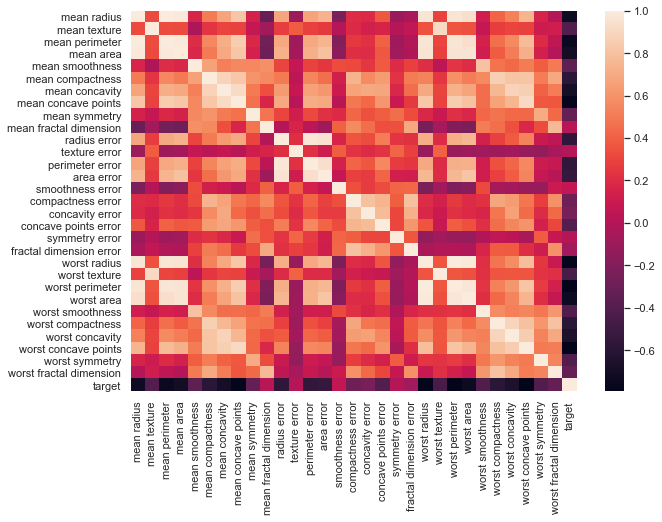

In [42]:
##finding out the correlation between features and the target variable 
plt.figure(figsize=(10,7))
sns.heatmap(data.corr())

In [75]:
## declaring the feature variable and target variable 
X = data.iloc[:,:-1].values
y = data['target']

In [76]:
#splitting the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

In [77]:
#training the model
#here, we will consider 5 neighbors and the measure of distance as Euclidean distance
knnModel = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
knnModel.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

*********** Classification Report *************
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        43
           1       0.93      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

************ Confusion Matrix ***********


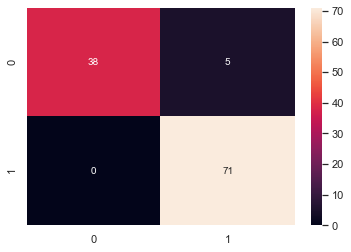

In [82]:
##predicting and evaluating accuracy of the model
prediction = knnModel.predict(X_test)
print("*********** Classification Report *************")
print(classification_report(y_test,prediction))
print("************ Confusion Matrix ***********")
sns.heatmap(confusion_matrix(y_test,prediction),annot=True)